In [11]:
%matplotlib inline
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Pull in CSV files & add to Pandas DF
city_data_to_load = "data/city_data.csv"
citydf = pd.read_csv(city_data_to_load)

ride_data_to_load = "data/ride_data.csv"
ridedf = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged_df = citydf.merge(ridedf,on='city', how='inner')

# finding total fare per city
groupedByCity = merged_df.groupby("city")["fare"].sum()
groupedByCity_df = groupedByCity.to_frame()
totalFaredf = groupedByCity_df.rename(columns={"fare":"total fare"})
totalFaredf.head()

#finding total number of rides per city
totalRides = merged_df.groupby("city")["fare"].count()
totalRides_df = totalRides.to_frame()
totalRides_df_renamed = totalRides_df.rename(columns={"fare":"total rides"})

#consolidating ridecount & total fare into another dataframe
combined_city_df3 = totalFaredf.join(totalRides_df_renamed, how = 'outer')

#create average fare from combined_city_df3
avg_fare = combined_city_df3["total fare"] / combined_city_df3["total rides"]
combined_city_df3["average fare"] = avg_fare

# Since the city df had an index but the combined city data had cities as the index, set city as index
cityIndex = citydf.set_index("city")

# Join the 2 DFs
cityIndexAll = combined_city_df3.join(cityIndex)

#add in an index for fun
cityData = cityIndexAll.reset_index()
cityData = cityData.rename(columns={"driver_count":"driver count"})
cityData.head()


,city,total fare,total rides,average fare,driver count,type
0,Amandaburgh,443.55,18,24.641667,12,Urban
1,Barajasview,557.31,22,25.332273,26,Urban
2,Barronchester,582.76,16,36.422500,11,Suburban
3,Bethanyland,593.21,18,32.956111,22,Suburban
4,Bradshawfurt,400.64,10,40.064000,7,Rural


## Bubble Plot of Ride Sharing Data

In [12]:
# x = total rides per city [x]
# y = average fare = total fare / number of rides in that city
# z= size (number of drivers per city)
# color = city types 

# get x and y coordinates for each of the three city types
cityTypenumpy = merged_df["type"].unique()
cityTypes = cityTypenumpy.tolist()

#create a df for each type: urban, suburban, rural
urban_df = cityData.loc[cityData['type']=="Urban"]

suburban_df = cityData.loc[cityData['type']=="Suburban"]

rural_df = cityData.loc[cityData['type']=="Rural"]
rural_df.head()


,city,total fare,total rides,average fare,driver count,type
4,Bradshawfurt,400.64,10,40.064000,7,Rural
17,Garzaport,72.37,3,24.123333,7,Rural
20,Harringtonfort,200.82,6,33.470000,4,Rural
24,Jessicaport,216.08,6,36.013333,1,Rural
33,Lake Jamie,206.15,6,34.358333,4,Rural


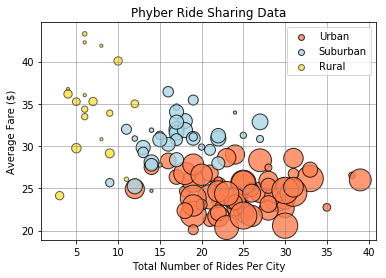

In [15]:
# Build the scatter plots for each city types
x = urban_df["total rides"]
y = urban_df["average fare"]
z = urban_df["driver count"]

a = suburban_df["total rides"]
b = suburban_df["average fare"]
c = suburban_df["driver count"]

d = rural_df["total rides"]
e = rural_df["average fare"]
f = rural_df["driver count"]

bubbleplot = plt.scatter(x,y,s=z*10, alpha = 0.8, color='coral',edgecolor='black',label='Urban')
bubbleplot = plt.scatter(a,b,s=c*10, alpha = 0.8, color='lightblue',edgecolor='black',label='Suburban')
bubbleplot = plt.scatter(d,e,s=f*10, alpha = 0.6, color='gold',edgecolor='black',label='Rural')

plt.title("Phyber Ride Sharing Data")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($)")
lgnd = plt.legend(loc="upper right")
plt.grid(color='grey', linestyle='-', linewidth=1,alpha = 0.5)

#setting points in legend to be the same size
for handle in lgnd.legendHandles:
    handle.set_sizes([35])

## Total Fares by City Type

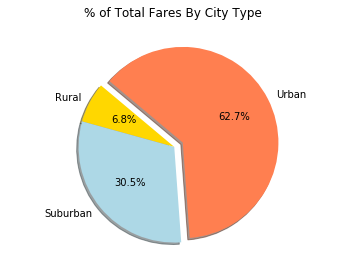

In [16]:
#columns: groupby type, total fare
totalFaresDF = cityData.groupby("type")["total fare"].sum()
totalFaresDF1 = totalFaresDF.to_frame()
totalFaresDF2 = totalFaresDF1.reset_index()
labels = totalFaresDF2["type"] 
explode = (0, 0, 0.1)
colors = ["gold","lightblue","coral"]

# Build Pie Chart
plt.pie(totalFaresDF1["total fare"], explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True,startangle=140)
plt.axis("equal")
plt.suptitle('% of Total Fares By City Type')

# save as png
plt.savefig("total_fares_by_city_type.png")

## Total Rides by City Type

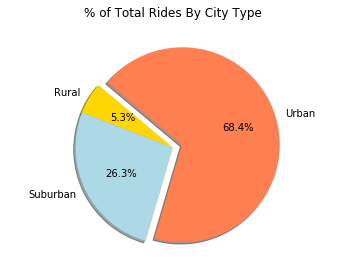

In [17]:
#columns: groupby type, total fare
totalRidesDF = cityData.groupby("type")["total rides"].sum()
totalRidesDF1 = totalRidesDF.to_frame()
totalRidesDF2 = totalRidesDF1.reset_index()
labels = totalRidesDF2["type"] 
explode = (0, 0, 0.1)
colors = ["gold","lightblue","coral"]

# Build Pie Chart
plt.pie(totalRidesDF2["total rides"], explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True,startangle=140)
plt.axis("equal")
plt.suptitle('% of Total Rides By City Type')

# save as png
plt.savefig("total_rides_by_city_type.png")

## Total Drivers by City Type

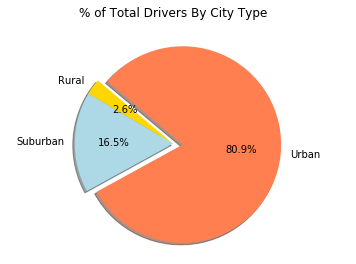

In [8]:
#columns: groupby type, total fare
totalDriversDF = cityData.groupby("type")["driver count"].sum()
totalDriversDF1 = totalDriversDF.to_frame()
totalDriversDF2 = totalDriversDF1.reset_index()
labels = totalDriversDF2["type"] 
explode = (0, 0, 0.1)
colors = ["gold","lightblue","coral"]

# Build Pie Chart
plt.pie(totalDriversDF2["driver count"], explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True,startangle=140)
plt.axis("equal")
plt.suptitle('% of Total Drivers By City Type')

# Save Figure
plt.savefig("total_drivers_by_city_type.png")